In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('star_type.csv')

In [3]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [6]:
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use('cyberpunk')

In [7]:
col = ['Temperature (K)','Luminosity(L/Lo)','Radius(R/Ro)','Absolute magnitude(Mv)','Star type','Star color','Spectral Class']

In [8]:
col

['Temperature (K)',
 'Luminosity(L/Lo)',
 'Radius(R/Ro)',
 'Absolute magnitude(Mv)',
 'Star type',
 'Star color',
 'Spectral Class']

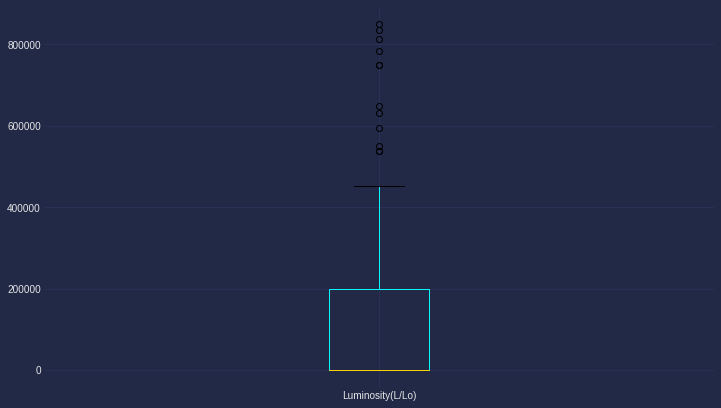

In [9]:
plt.figure(figsize=(12,7))
df.boxplot(column = ['Luminosity(L/Lo)'])
plt.show()

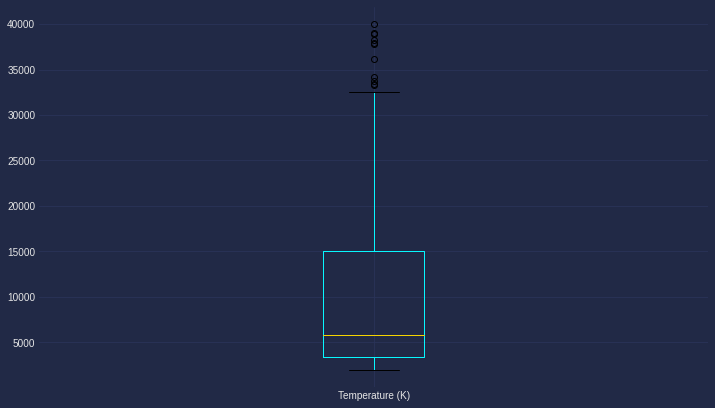

In [10]:
plt.figure(figsize=(12,7))
df.boxplot(column = ['Temperature (K)'])
plt.show()

In [11]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [12]:
x = df.drop('Star type',axis = 1)
y = df['Star type']

In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Star type, Length: 240, dtype: int64

In [60]:
x.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['Spectral Class','Star color']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                remainder = "passthrough")
transformed_x = transformer.fit_transform(df) 

In [15]:
transformed_x

<240x31 sparse matrix of type '<class 'numpy.float64'>'
	with 1640 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(transformed_x,y,test_size=0.25,random_state = 42)

In [17]:
x_train.shape

(180, 31)

In [18]:
x_test.shape

(60, 31)

In [19]:
y_train.shape

(180,)

In [20]:
y_test.shape

(60,)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model_lr = LogisticRegression(solver='lbfgs', max_iter=1000).fit(x_train,y_train)

/home/admin2/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
y_pred_lr = model_lr.predict(x_test)

In [24]:
y_pred_lr

array([2, 0, 3, 4, 4, 5, 5, 2, 0, 2, 4, 2, 5, 4, 5, 5, 0, 1, 3, 0, 0, 1,
       5, 3, 5, 4, 1, 2, 5, 3, 3, 4, 2, 0, 1, 0, 1, 5, 1, 5, 4, 5, 4, 0,
       3, 0, 4, 3, 1, 0, 2, 0, 2, 1, 4, 2, 5, 3, 1, 1])

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_lr)

0.9666666666666667

In [26]:
from sklearn.metrics import confusion_matrix
cf_lr = confusion_matrix(y_test,y_pred_lr)

In [27]:
from mlxtend.plotting import plot_confusion_matrix

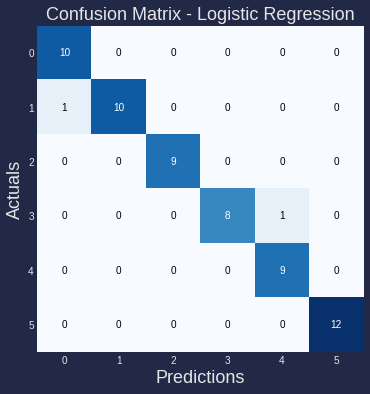

In [37]:
fig, ax = plot_confusion_matrix(conf_mat=cf_lr, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Logistic Regression', fontsize=18)
plt.show()

In [28]:
model_lr.score(x_test,y_test)

0.9666666666666667

In [30]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()

In [31]:
model_nb.fit(x_train.todense(),y_train)

GaussianNB()

In [32]:
y_pred_nb = model_nb.predict(x_test.todense())

In [33]:
y_pred_nb

array([2, 0, 2, 4, 3, 5, 5, 2, 0, 2, 4, 2, 5, 4, 5, 5, 0, 1, 3, 0, 0, 1,
       5, 4, 5, 3, 1, 2, 5, 3, 2, 4, 2, 1, 1, 0, 0, 5, 1, 5, 4, 5, 4, 0,
       3, 0, 4, 2, 1, 1, 2, 0, 2, 1, 4, 2, 5, 2, 1, 1])

In [34]:
accuracy_score(y_test,y_pred_nb)

0.8333333333333334

In [35]:
cf_nb = confusion_matrix(y_test,y_pred_nb)

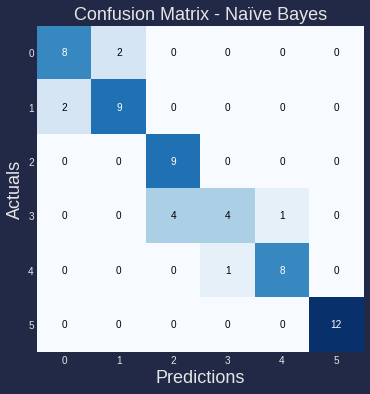

In [36]:
fig, ax = plot_confusion_matrix(conf_mat=cf_nb, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Naїve Bayes', fontsize=18)
plt.show()

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
y_pred_knn = model_knn.predict(x_test)

In [41]:
y_pred_knn

array([2, 1, 3, 4, 5, 5, 4, 2, 0, 2, 5, 2, 5, 4, 5, 5, 0, 1, 3, 0, 0, 0,
       5, 3, 4, 3, 1, 2, 4, 3, 3, 4, 2, 0, 0, 0, 0, 5, 1, 4, 4, 4, 4, 0,
       3, 0, 5, 3, 1, 1, 2, 0, 2, 0, 4, 2, 4, 2, 1, 1])

In [42]:
accuracy_score(y_test,y_pred_knn)

0.7166666666666667

In [43]:
cf_knn = confusion_matrix(y_test,y_pred_knn)

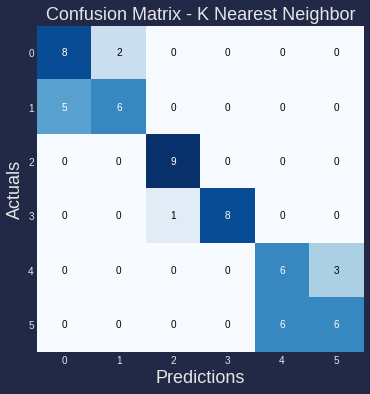

In [44]:
fig, ax = plot_confusion_matrix(conf_mat=cf_knn, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - K Nearest Neighbor', fontsize=18)
plt.show()

In [45]:
from sklearn.svm import SVC

In [46]:
model_svm = SVC(kernel = 'linear')

In [47]:
model_svm.fit(x_train,y_train)

SVC(kernel='linear')

In [48]:
y_pred_svm = model_svm.predict(x_test)

In [49]:
y_pred_svm

array([2, 0, 3, 4, 4, 5, 5, 2, 0, 2, 4, 2, 5, 4, 5, 5, 0, 1, 3, 0, 0, 1,
       5, 3, 5, 4, 1, 2, 5, 3, 3, 4, 2, 0, 1, 0, 1, 5, 1, 5, 4, 5, 4, 1,
       3, 0, 4, 3, 1, 0, 2, 0, 2, 1, 4, 2, 5, 3, 1, 1])

In [50]:
accuracy_score(y_test,y_pred_svm)

0.9833333333333333

In [51]:
cf_svm = confusion_matrix(y_test,y_pred_svm)

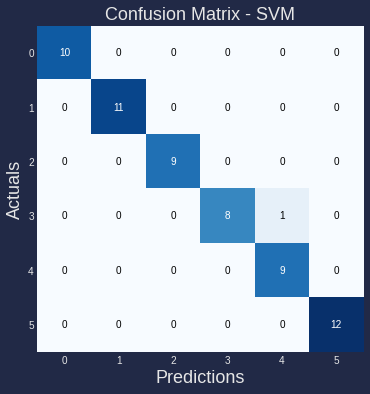

In [52]:
fig, ax = plot_confusion_matrix(conf_mat=cf_svm, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - SVM', fontsize=18)
plt.show()

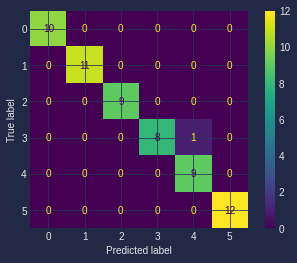

In [133]:
plot_confusion_matrix(model_svm, x_test, y_test) 

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
model_dtree = DecisionTreeClassifier(max_depth = 10,min_samples_leaf = 15)

In [55]:
model_dtree.fit(x_train,y_train)
y_pred_dtree = model_dtree.predict(x_test)

In [56]:
y_pred_dtree

array([2, 0, 3, 4, 4, 5, 5, 2, 0, 2, 4, 2, 5, 4, 5, 5, 0, 1, 3, 0, 0, 1,
       5, 3, 5, 3, 1, 2, 5, 3, 3, 4, 2, 0, 1, 0, 1, 5, 1, 5, 4, 5, 4, 1,
       3, 0, 4, 3, 1, 0, 2, 0, 2, 1, 4, 2, 5, 3, 1, 1])

In [57]:
accuracy_score(y_test,y_pred_dtree)

1.0

In [66]:
cf_dtree = confusion_matrix(y_test,y_pred_dtree)

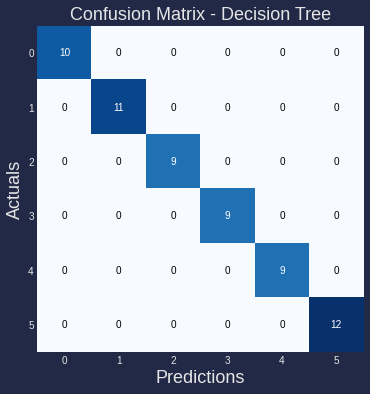

In [67]:
fig, ax = plot_confusion_matrix(conf_mat=cf_dtree, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Decision Tree', fontsize=18)
plt.show()

In [61]:
from sklearn.metrics import precision_recall_fscore_support

In [62]:
precision_recall_fscore_support(y_test,y_pred_svm)

(array([1. , 1. , 1. , 1. , 0.9, 1. ]),
 array([1.        , 1.        , 1.        , 0.88888889, 1.        ,
        1.        ]),
 array([1.        , 1.        , 1.        , 0.94117647, 0.94736842,
        1.        ]),
 array([10, 11,  9,  9,  9, 12]))

In [63]:
from sklearn.metrics import precision_score

In [71]:
precision_score(y_test, y_pred_dtree,average='micro')

1.0

In [72]:
precision_score(y_test, y_pred_knn,average='micro')

0.7166666666666667